In [120]:
import astropy
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [121]:
#APOKASC file & file variables
hdul = fits.open(r"/Users/amber3/Desktop/SSI/APOKASC_cat_v6.7.2.fits")
#hdul.info()
hdu = hdul[1]
data = hdu.data
#print(np.shape(data))
KIC_A = hdu.data['KEPLER_INT'] 
Logg_A = hdu.data['DR16_LOGG_COR']
Logg_err = hdu.data['DR16_LOGG_COR_ERR']
Teff_A = hdu.data['DR16_TEFF_COR']
Teff_err = hdu.data['DR16_TEFF_COR_ERR']
FeH_A = hdu.data['DR16_M_H_COR']
FeH_A_err = hdu.data['Dr16_M_H_COR_ERR']
#print(Logg_A)
FeH_err = hdu.data['DR16_M_H_COR_ERR']
R_APO3 = hdu.data['APOKASC3P_RADIUS']
R_APO3_err = hdu.data['APOKASC3P_RADIUS_ERR']
R_Gaia = hdu.data['GAIA_RADIUS'] #no error on this radius
M_APO3 = hdu.data['APOKASC3P_MASS']
M_APO3_err = hdu.data['APOKASC3P_MASS_ERR']

In [122]:
#f = open('/Users/amber3/Desktop/gaia_radii_apokasc3 .dat', 'r')
#header = f.readline()
#print(header)
#there are some empty entries in error and radius, so flags are put in as -42 and only pos entries are taken
R_data = ascii.read('/Users/amber3/Desktop/gaia_radii_apokasc3 .dat', delimiter = ',') #data_Splitter = 'KIC') #fill_values = [('-42.0', '', '-42.0')])
KIC_Gaia = R_data['KIC']
R_Gaia = 1.0/R_data['inv_r_gaia_K_MIST']
#R_Gaia_err = 1.0/R_data['inv_r_gaia_K_MIST_err']
R_Gaia_err_per = R_data['inv_r_gaia_K_MIST_err']/R_data['inv_r_gaia_K_MIST'] 
R_Gaia_err = R_Gaia_err_per * R_Gaia
#help(R_Gaia[0])
#print(KIC_Gaia[0])
#print(type(KIC_Gaia))
print(R_Gaia_err)

#KIC_Gaia = 
#for lines in R_data:
    #cols = lines.strip('\n').split(',')
    #print(cols)
    #KIC_Gaia = int(cols[0])
    #Gaia_rad = 1.0/float(cols[1])
    #Gaia_rad_err = 1.0/float(cols[2])
    #print(Gaia_rad)
#cols = R_data.split(',')
#print(np.shape(cols))

inv_r_gaia_K_MIST_err
---------------------
   1.1329750550674924
   0.3980318757106232
    0.599982638317747
   0.3656148490948969
  0.22786523565522532
    2.165530361313312
  0.44468518817024905
                  ...
    49.38366116265747
   0.8207903397948537
    8.380984118907424
     9.98327494418534
   369.12395747674947
    22.79847535484972
   23.205236370197742
Length = 12632 rows


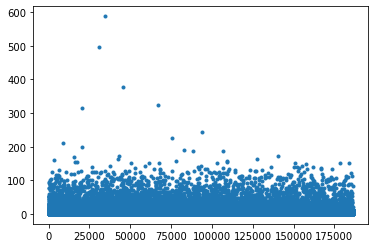

In [123]:
#read in 2020 Berger R file, follow same process
hdul = fits.open(r"/Users/amber3/Desktop/asu.fit")
hdu = hdul[1]
KIC_Berger = hdu.data['KIC']
Berger_rad = hdu.data['Rad']
Berger_upper_err = hdu.data['E_Rad']
Berger_lower_err = hdu.data['e_rad_lc']
plt.plot(Berger_rad, '.')
#compare 2020 Berger radii with APO3 R
#intersection of both KIC and plotting both radii (one against the other)

In [124]:
#APOLLINAIRE file & file variables (b = background)
hdul_b = fits.open(r"/Users/amber3/Desktop/SSI/Selected_stars_final.fits")
hdu_b = hdul_b[0]
data_b = hdu_b.data
KIC_b = np.array(data_b[:,0,0])
#print(KIC_b)

In [125]:
#APAOKASC and background intersection and filtering
common_KIC, A_indices, b_indices = np.intersect1d(KIC_A, KIC_b, return_indices=True)
#print(np.shape(A_indices), np.shape(b_indices))
good_indices = np.where((Teff_A[A_indices] > 0) & (R_APO3[A_indices] > 0))
bad_indices = np.where(np.logical_or(Teff_A[A_indices] <= 0, R_APO3[A_indices] <= 0))
#bad_T_indices = np.where(Teff_A[A_indices] <= 0)
#bad_R_indices = np.where(R_APO3[A_indices] <= 0)
#print(Teff_A[A_indices[bad_T_indices]], R_APO3[A_indices[bad_R_indices]])
print(Teff_A[A_indices[bad_indices]], R_APO3[A_indices[bad_indices]])
print(bad_indices)
b_indices = b_indices[good_indices]
A_indices = A_indices[good_indices]
print(np.where(Teff_A[A_indices] < 0))
print(A_indices)
print(np.where(R_APO3[A_indices] < 0))

KIC_b = KIC_b[b_indices]
logg_final = Logg_A[A_indices]
logg_final_err = Logg_err[A_indices]
Teff_final = Teff_A[A_indices]
#print(Teff_final)
#print(np.where(Teff_final < 0)) 
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[A_indices]
Teff_err_log = ((Teff_final_err)/(log_Teff_final))/np.log(10) 
FeH_final = FeH_A[A_indices]
FeH_final_err = FeH_A_err[A_indices]

print(np.shape(logg_final), np.shape(KIC_b))
Amp_HV1 = np.array(data_b[b_indices,0,6])
Amp_HV1_err = np.array(data_b[b_indices,1,6])
Amp_HV2 = np.array(data_b[b_indices,0,9])
Amp_HV2_err = np.array(data_b[b_indices,1,9])
Freq_HV1 = np.array(data_b[b_indices,0,7])
Freq_HV1_err = np.array(data_b[b_indices,1,7])
Freq_HV2 = np.array(data_b[b_indices,0,10])
Freq_HV2_err = np.array(data_b[b_indices,1,10])
Evol_stage = np.array(data_b[b_indices,0,3])
#Gaussian_amp = np.array(data_b[b_indices,0,14])
#Gaussian_width = np.array(data_b[b_indices,0,16])
#print(KIC_A, KIC_b)

[-9999.99  -9999.99  -9999.99   4805.594 -9999.99  -9999.99  -9999.99
 -9999.99  -9999.99  -9999.99 ] [-9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999. -9999.]
(array([ 318,  761,  794, 1898, 2156, 2211, 3250, 3297, 3401, 3605]),)
(array([], dtype=int64),)
[ 863 4166 4232 ... 5782 5784 5795]
(array([], dtype=int64),)
(3990,) (3990,)


In [126]:
#Gaia and background intersection and filtering
print(np.shape(KIC_b), np.shape(Amp_HV1))
common_KIC_G, A_indices_G, b_indices_G = np.intersect1d(KIC_Gaia, KIC_b, return_indices=True)
good_indices_G = np.where((R_Gaia[A_indices_G] > 0) & (R_Gaia_err[A_indices_G] > 0))
b_indices_G = b_indices_G[good_indices_G]
A_indices_G = A_indices_G[good_indices_G]

print(np.shape(A_indices_G), np.shape(b_indices_G))
KIC_final = KIC_Gaia[A_indices_G]
#use amps and freq data from previous data file 

logg_final_G = logg_final[b_indices_G]
logg_final_G_err = logg_final_err[b_indices_G]
Teff_final_G = Teff_final[b_indices_G]
#print(Teff_final)
#plt.plot(Teff_final_G, logg_final_G, '.')
#print(np.where(Teff_final_G < 0)) 
#print(np.shape(Teff_A), np.shape(Logg_A))
log_Teff_final_G = np.log10(Teff_final_G)
Teff_final_G_err = Teff_final_err[b_indices_G]
Teff_G_err_log = ((Teff_final_G_err)/(log_Teff_final_G))/np.log(10) 
FeH_final_G = FeH_final[b_indices_G]
FeH_final_G_err = FeH_final_err[b_indices_G]

Amp_HV1_G = Amp_HV1[b_indices_G]
Amp_HV1_G_err = Amp_HV1_err[b_indices_G]
Amp_HV2_G = Amp_HV2[b_indices_G]
Amp_HV2_G_err = Amp_HV2_err[b_indices_G]
Freq_HV1_G = Freq_HV1[b_indices_G]
Freq_HV1_G_err = Freq_HV1_err[b_indices_G]
Freq_HV2_G = Freq_HV2[b_indices_G]
Freq_HV2_G_err = Freq_HV2_err[b_indices_G]
Evol_stage_G = Evol_stage[b_indices_G]

#resave Gaia rad, err on rad, and all harvey params 
#ex: Amp_HV1_final = Amp_HV1[b_indices_G]

(3990,) (3990,)
(3647,) (3647,)


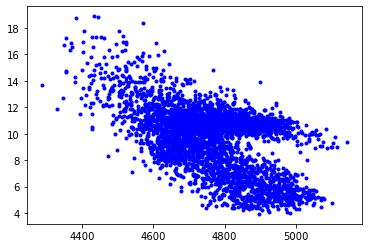

In [127]:
plt.plot(Teff_A[A_indices], R_APO3[A_indices], 'b.')

(3647,)


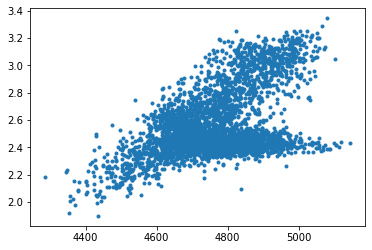

In [128]:
R_APO3_final = R_APO3[A_indices]
R_APO3_final_err = R_APO3_err[A_indices]
R_Gaia_final = R_Gaia[A_indices_G] 
print(np.shape(R_Gaia_final))
R_Gaia_final_err = R_Gaia_err[A_indices_G]

#logg_final = Logg_A[A_indices]
#logg_final_err = Logg_err[A_indices]
#Teff_final = Teff_A[A_indices]
#print(Teff_final)
#print(np.where(Teff_final < 0)) 
#log_Teff_final = np.log10(Teff_final)
#Teff_final_err = Teff_err[A_indices]
#Teff_err_log = ((Teff_final_err)/(log_Teff_final))/np.log(10) 
#FeH_final = FeH_A[A_indices]
#FeH_final_err = FeH_A_err[A_indices]

#plt.plot(Teff_A, Logg_A, '.')
#logg_final_G = Logg_A[A_indices_G]
#logg_final_G_err = Logg_err[A_indices_G]
#Teff_final_G = Teff_A[A_indices_G]
#print(Teff_final)

plt.plot(Teff_final_G, logg_final_G, '.')
#print(np.where(Teff_final_G < 0)) 
#log_Teff_final_G = np.log10(Teff_final_G)
#Teff_final_G_err = Teff_err[A_indices_G]
#Teff_G_err_log = ((Teff_final_G_err)/(log_Teff_final_G))/np.log(10) 
#FeH_final_G = FeH_A[A_indices_G]
#FeH_final_G_err = FeH_A_err[A_indices_G]
#print(log_Teff_final) #runtime warning with neg values?
#print(Teff_err_log)

rpw = 2

Amp_HV1_APO3 =  Amp_HV1 * R_APO3_final**rpw
Amp_HV1_APO3_err = ((Amp_HV1_err/Amp_HV1) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_HV1_APO3
Amp_HV1_APO3_err_log = ((Amp_HV1_APO3_err)/(Amp_HV1_APO3))/np.log(10)

Amp_HV2_APO3 =  Amp_HV2 * R_APO3_final**rpw
Amp_HV2_APO3_err = ((Amp_HV2_err/Amp_HV2) + (rpw*R_APO3_final_err/R_APO3_final)) * Amp_HV2_APO3
Amp_HV2_APO3_err_log = ((Amp_HV2_APO3_err)/(Amp_HV2_APO3))/np.log(10)

Amp_HV1_Gaia =  Amp_HV1_G * R_Gaia_final**rpw
Amp_HV1_Gaia_err = ((Amp_HV1_G_err/Amp_HV1_G) + (rpw*R_Gaia_final_err/R_Gaia_final)) * Amp_HV1_G

Amp_HV2_Gaia =  Amp_HV2_G * R_Gaia_final**rpw
Amp_HV2_Gaia_err = ((Amp_HV2_G_err/Amp_HV2_G) + (rpw*R_Gaia_final_err/R_Gaia_final)) * Amp_HV2_G

Amp_HV1_err_log = ((Amp_HV1_err)/(Amp_HV1))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_err)/(Amp_HV2))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_err)/(Freq_HV1))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_err)/(Freq_HV2))/np.log(10)

Amp_HV1_G_err_log = ((Amp_HV1_G_err)/(Amp_HV1_G))/np.log(10)
Amp_HV2_G_err_log = ((Amp_HV2_G_err)/(Amp_HV2_G))/np.log(10)
Freq_HV1_G_err_log = ((Freq_HV1_G_err)/(Freq_HV1_G))/np.log(10)
Freq_HV2_G_err_log = ((Freq_HV2_G_err)/(Freq_HV2_G))/np.log(10)

2.694704 3.6761162
A1_RG
[ 5.53200178 -4.3710887  -2.88380897  0.29588743]
[0.00571386 0.86228546 0.01865749 0.02668646]
A1_RC
[  6.1612201  -20.29505145  -1.42967733  -0.73369487]
[0.01286149 0.59676456 0.03449662 0.02591193]
A2_RG
[ 4.86905181 -3.56099494 -3.01327139  0.31151279]
[0.0062959  0.91492644 0.01985183 0.02812973]
A2_RC
[  5.5112393  -21.39454309  -1.54900808  -0.88808522]
[0.01419678 0.68342842 0.03800278 0.02938243]


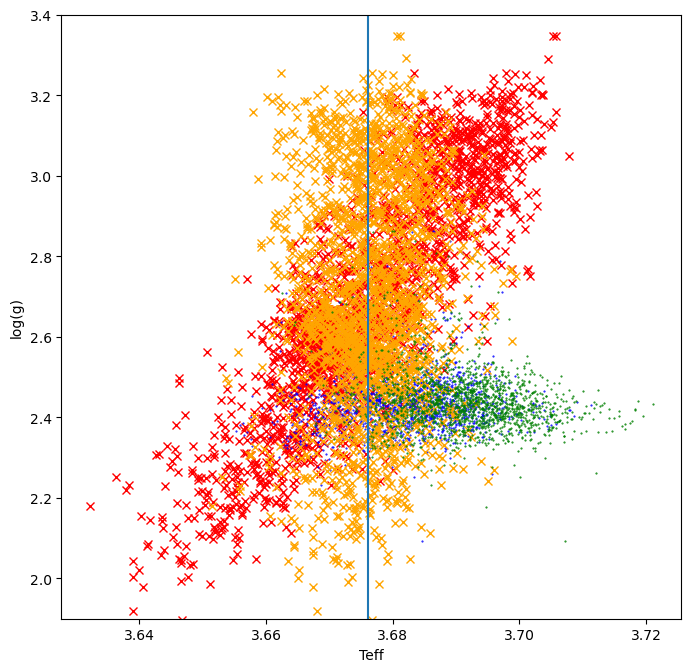

In [129]:
#APO3 data

#%matplotlib inline
figure(figsize=(8,8), dpi=100)
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

def logg_fit(X, a, b):
    x = X
    return a + b*x
         
red_giant = np.where(Evol_stage == 1)
red_clump = np.where(Evol_stage == 2)
#print(Teff_final[red_giant])

mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(log_Teff_final[red_giant])
print(mean_logg, mean_l_teff) #neg value in log_Teff_final bc of runtime warning in Teff_final, printing nan

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7

theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#rotated plots
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))
coeffs = np.ones((4, 6, 2)) #switch 2 and 4?
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_APO3[red_giant]), sigma=(Amp_HV1_APO3_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_APO3[red_clump]), sigma=(Amp_HV1_APO3_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_APO3[red_giant]), sigma=(Amp_HV2_APO3_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_APO3[red_clump]), sigma=(Amp_HV2_APO3_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], 'b.', ms=1)
plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x', color='orange')
plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, 'g.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

In [130]:
#fit in rotated atm params with respect to APO3 R corrected amps

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_APO3[red_giant]), sigma=(Amp_HV1_APO3_err_log[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_APO3[red_clump]), sigma=(Amp_HV1_APO3_err_log[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_APO3[red_giant]), sigma=(Amp_HV2_APO3_err_log[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_APO3[red_clump]), sigma=(Amp_HV2_APO3_err_log[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.53200178 -4.3710887  -2.88380897  0.29588743]
[0.00571386 0.86228546 0.01865749 0.02668646]
A1_RC
[  6.1612201  -20.29505145  -1.42967733  -0.73369487]
[0.01286149 0.59676456 0.03449662 0.02591193]
A2_RG
[ 4.86905181 -3.56099494 -3.01327139  0.31151279]
[0.0062959  0.91492644 0.01985183 0.02812973]
A2_RC
[  5.5112393  -21.39454309  -1.54900808  -0.88808522]
[0.01419678 0.68342842 0.03800278 0.02938243]


In [131]:
#matched subsample of giants+clump of A1 and A2 with APO3 R
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)

index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))

index_RC = index_RC[iu]
index_RG = index_RG[iu]

#amplitude 1 red giants and clump subsample
Amp_HV1_RG = Amp_HV1_APO3[red_giant]
Amp_HV1_RC = Amp_HV1_APO3[red_clump]

index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_APO3_err_log[red_giant]

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

Amp_HV1_err_log_RC = Amp_HV1_APO3_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

#amplitude 2 red giants and clump subsample
Amp_HV2_RG = Amp_HV2_APO3[red_giant]
Amp_HV2_RC = Amp_HV2_APO3[red_clump]

index_inliers = np.where((np.log10(Amp_HV2_RG[index_RG])-np.log10(Amp_HV2_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV2_err_log_RG = Amp_HV2_APO3_err_log[red_giant]

A2_Rg_s_opt, A2_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV2_RG[index_RG]), sigma=(Amp_HV2_err_log_RG[index_RG]))
A2_Rg_s_perr = np.sqrt(np.diag(A2_Rg_s_cov))
print()
print('A2_RG_s')
print(A2_Rg_s_opt)
print(A2_Rg_s_perr)

Amp_HV2_err_log_RC = Amp_HV2_APO3_err_log[red_clump]

A2_Rc_s_opt, A2_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV2_RC[index_RC]), sigma=(Amp_HV2_err_log_RC[index_RC]))
A2_Rc_s_perr = np.sqrt(np.diag(A2_Rc_s_cov))
print('A2_RC_s')
print(A2_Rc_s_opt)
print(A2_Rc_s_perr)

A1_RG_s
[166.68502823 -43.0060621   -1.11776222  -0.37425128]
[21.58637046  6.00695356  0.26452277  0.19624058]
A1_RC_s
[ 62.62408963 -15.19593563  -0.18214043  -0.51607487]
[11.00675798  3.05299044  0.13042601  0.10178306]

A2_RG_s
[167.5038566  -43.33035714  -1.22977486  -0.3273037 ]
[21.72899908  6.04403397  0.26456487  0.19663548]
A2_RC_s
[ 65.29515749 -15.94833814  -0.40081112  -0.64825511]
[13.62533182  3.77707443  0.15545519  0.12004943]


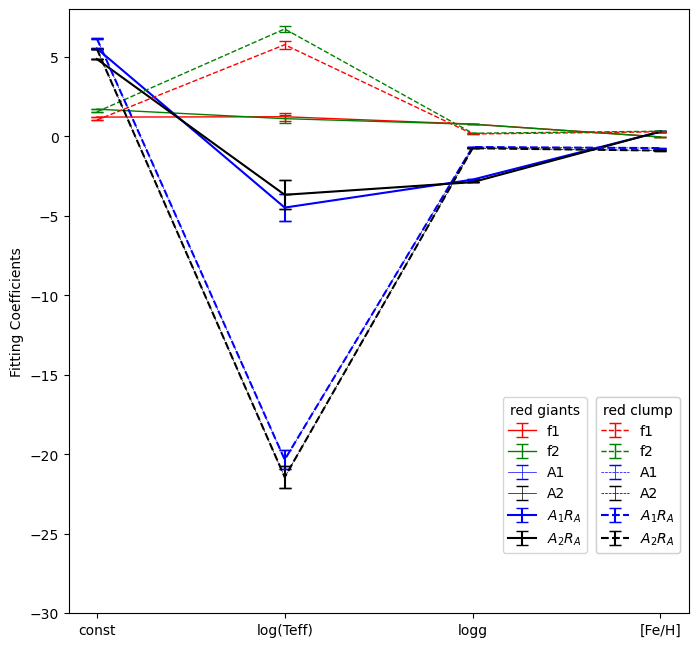

In [141]:
#transformed coefficient plot from APO3 Radius overplotted on untransformed one
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

%matplotlib inline
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_A$') 
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_A$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_A$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_A$') #R^2
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)

#lines 3, 4, 10, 11 not showing up?

#Amps corrected for APO3 radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.show()

In [140]:
#ALL FITTING COEFFS FROM GRAPH ABOVE

print('APO3 red giant coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,0])
print('FREQ 2')
print(Tg_coeffs[:,1,0])
print('AMP 1')
print(Tg_coeffs[:,2,0])
print('AMP 2')
print(Tg_coeffs[:,3,0])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,0])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,0], '\n')

print('APO3 red clump coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,1])
print('FREQ 2')
print(Tg_coeffs[:,1,1])
print('AMP 1')
print(Tg_coeffs[:,2,1])
print('AMP 2')
print(Tg_coeffs[:,3,1])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,1])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,1], '\n')

APO3 red giant coefficients
---------------------------
FREQ 1
[ 1.21749774  1.23889042  0.77595851 -0.03265557]
FREQ 2
[ 1.71478433  1.11835558  0.76515745 -0.03224622]
AMP 1
[ 5.53200178 -4.47636834 -2.7175167   0.29588743]
AMP 2
[ 4.86905181 -3.67171165 -2.87732915  0.31151279]
GAIA AMP 1
[ 5.53200178 -4.47636834 -2.7175167   0.29588743]
GAIA AMP 2
[ 4.86905181 -3.67171165 -2.87732915  0.31151279] 

APO3 red clump coefficients
---------------------------
FREQ 1
[1.03027981 5.77080913 0.15567649 0.2896658 ]
FREQ 2
[1.54633854 6.76099406 0.20125821 0.32727603]
AMP 1
[  6.1612201  -20.33444122  -0.66602622  -0.73369487]
AMP 2
[  5.5112393  -21.43764047  -0.74395633  -0.88808522]
GAIA AMP 1
[  6.1612201  -20.33444122  -0.66602622  -0.73369487]
GAIA AMP 2
[  5.5112393  -21.43764047  -0.74395633  -0.88808522] 



A1_RG
[ 5.51599529 -7.14759953 -2.88337592  0.2689728 ]
[0.00674644 0.91409248 0.02046301 0.02837409]
A1_RC
[  6.14897731 -19.51622092  -1.44350044  -0.68909349]
[0.01420391 0.65122048 0.03820238 0.02835267]
A2_RG
[ 4.85972013 -5.5703104  -3.01663094  0.29117198]
[0.00716683 0.96125585 0.02146293 0.02963107]
A2_RC
[  5.50206761 -20.74088285  -1.56167664  -0.85542368]
[0.01583218 0.75288908 0.04212389 0.03272672]


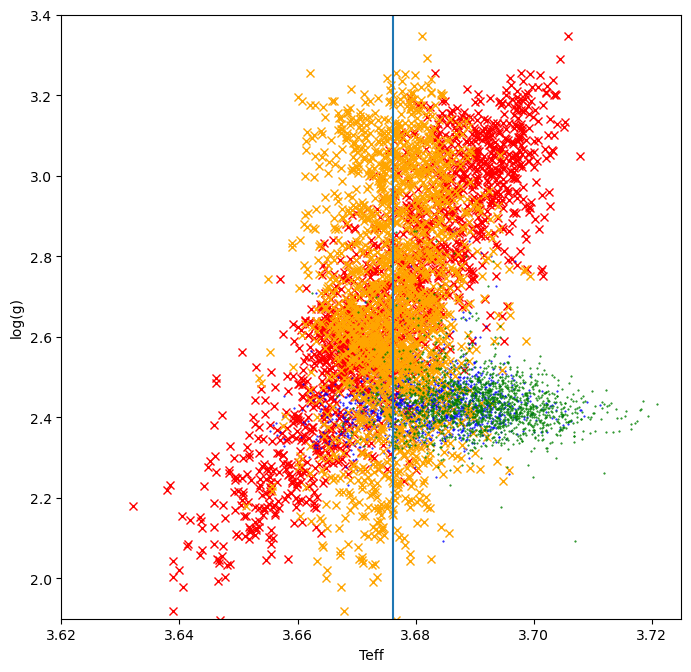

In [115]:
#GAIA data
#issues with theta...

#%matplotlib inline
figure(figsize=(8,8), dpi=100)
         
red_giant = np.where(Evol_stage_G == 1)
red_clump = np.where(Evol_stage_G == 2)
#print(Teff_final[red_giant])

mean_logg = np.mean(logg_final_G[red_giant])
mean_l_teff = np.mean(log_Teff_final_G[red_giant])
#print(mean_logg, mean_l_teff)
#print(mean_l_teff) #neg value in log_Teff_final bc of runtime warning in Teff_final, printing nan

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final_G[red_giant])-mean_l_teff), logg_final_G[red_giant]-mean_logg, sigma=(logg_final_G_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))
logg_opt[1] = 18.614913/0.7

theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#rotated plots
x_prime = ((np.log10(Teff_final_G)-mean_l_teff)*np.cos(theta)) - ((logg_final_G-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final_G)-mean_l_teff)*np.sin(theta)) + ((logg_final_G-mean_logg)*np.cos(theta))
coeffs = np.ones((4, 6, 2)) #switch 2 and 4?
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Freq_HV1_G[red_giant]), sigma=(Freq_HV1_G_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Freq_HV1_G[red_clump]), sigma=(Freq_HV1_G_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Freq_HV2_G[red_giant]), sigma=(Freq_HV2_G_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Freq_HV2_G[red_clump]), sigma=(Freq_HV2_G_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Amp_HV1_Gaia[red_giant]), sigma=(Amp_HV1_G_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Amp_HV1_Gaia[red_clump]), sigma=(Amp_HV1_G_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Amp_HV2_Gaia[red_giant]), sigma=(Amp_HV2_G_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Amp_HV2_Gaia[red_clump]), sigma=(Amp_HV2_G_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(np.log10(Teff_final_G[red_giant]), logg_final_G[red_giant], 'rx')
plt.plot(np.log10(Teff_final_G[red_clump]), logg_final_G[red_clump], 'b.', ms=1)
plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x', color='orange')
plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, 'g.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
plt.xlim(3.62, 3.725)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

In [116]:
#fit in rotated atm params with respect to Gaia R corrected amps
#no sigma

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Amp_HV1_Gaia[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Amp_HV1_Gaia[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final_G[red_giant]), np.log10(Amp_HV2_Gaia[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final_G[red_clump]), np.log10(Amp_HV2_Gaia[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
#print(np.shape(Amp_HV2_err_log[red_clump]))
#print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 5.54289517 -5.1351048  -2.88544315  0.26790422]
[0.00594296 0.92883339 0.01842365 0.02817589]
A1_RC
[  6.16069898 -18.47929161  -1.37903101  -0.63819322]
[0.01472994 0.6436411  0.04097626 0.02805567]
A2_RG
[ 4.87325879 -5.12673203 -3.01055266  0.25973944]
[0.00635797 0.99369538 0.0197102  0.03014346]
A2_RC
[  5.50549492 -18.94096608  -1.45830635  -0.7806764 ]
[0.01645185 0.71888165 0.04576632 0.03133533]


In [117]:
#matched subsample of giants+clump of A1 and A2 with Gaia R
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final_G[red_giant]
log_Teff_final_RC = log_Teff_final_G[red_clump]
logg_final_RG = logg_final_G[red_giant]
logg_final_RC = logg_final_G[red_clump]
FeH_final_RG = FeH_final_G[red_giant]
FeH_final_RC = FeH_final_G[red_clump]
#print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
#print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
#print(np.size(index_RC), np.size(index_RG))
#print(index_RG)
np.shape(index_RG)

iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)

index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))

index_RC = index_RC[iu]
index_RG = index_RG[iu]

#amplitude 1 red giants and clump subsample
Amp_HV1_RG = Amp_HV1_Gaia[red_giant]
Amp_HV1_RC = Amp_HV1_Gaia[red_clump]

index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_G_err_log[red_giant]

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

Amp_HV1_err_log_RC = Amp_HV1_G_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

#amplitude 2 red giants and clump subsample
Amp_HV2_RG = Amp_HV2_Gaia[red_giant]
Amp_HV2_RC = Amp_HV2_Gaia[red_clump]

index_inliers = np.where((np.log10(Amp_HV2_RG[index_RG])-np.log10(Amp_HV2_RC[index_RC])) > (-2.4))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV2_err_log_RG = Amp_HV2_G_err_log[red_giant]

A2_Rg_s_opt, A2_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A2_Rg_s_perr = np.sqrt(np.diag(A2_Rg_s_cov))
print()
print('A2_RG_s')
print(A2_Rg_s_opt)
print(A2_Rg_s_perr)

Amp_HV2_err_log_RC = Amp_HV2_G_err_log[red_clump]

A2_Rc_s_opt, A2_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A2_Rc_s_perr = np.sqrt(np.diag(A2_Rc_s_cov))
print('A2_RC_s')
print(A2_Rc_s_opt)
print(A2_Rc_s_perr)

A1_RG_s
[183.71571653 -47.91834336  -0.72841156  -0.52330306]
[25.89758555  7.19738104  0.30700354  0.23238951]
A1_RC_s
[ 62.1514241  -15.00819939  -0.2695965   -0.52944989]
[11.66784067  3.23924806  0.15038853  0.10873669]

A2_RG_s
[183.71571653 -47.91834336  -0.72841156  -0.52330306]
[25.89758555  7.19738104  0.30700354  0.23238951]
A2_RC_s
[ 62.1514241  -15.00819939  -0.2695965   -0.52944989]
[11.66784067  3.23924806  0.15038853  0.10873669]


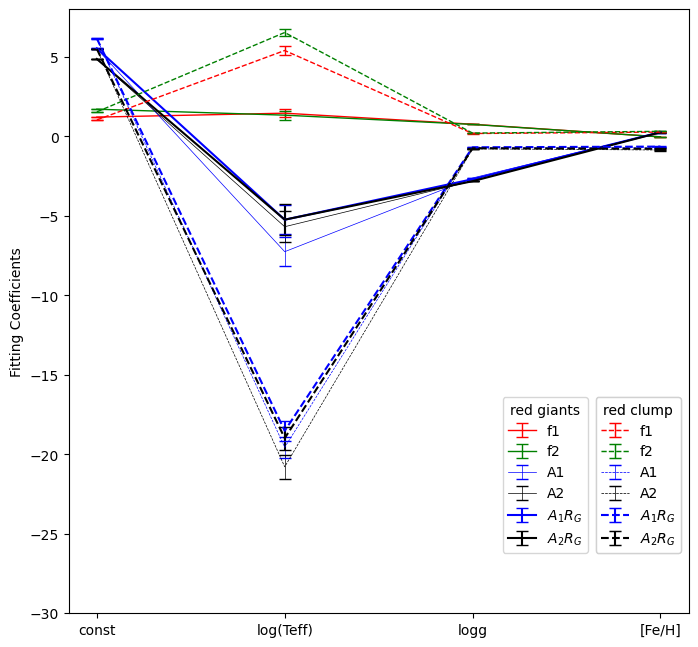

In [118]:
#transformed coefficient plot from GAIA Radius overplotted on untransformed one
figure(figsize=(8,8), dpi=100)
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

%matplotlib inline
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R_G$') 
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R_G$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R_G$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R_G$') #R^2
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for Gaia radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-30, 8)
plt.show()

In [119]:
#ALL FITTING COEFFS FROM GRAPH ABOVE

print('Gaia red giant coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,0])
print('FREQ 2')
print(Tg_coeffs[:,1,0])
print('AMP 1')
print(Tg_coeffs[:,2,0])
print('AMP 2')
print(Tg_coeffs[:,3,0])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,0])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,0], '\n')

print('Gaia red clump coefficients')
print('---------------------------')
print('FREQ 1')
print(Tg_coeffs[:,0,1])
print('FREQ 2')
print(Tg_coeffs[:,1,1])
print('AMP 1')
print(Tg_coeffs[:,2,1])
print('AMP 2')
print(Tg_coeffs[:,3,1])
print('GAIA AMP 1')
print(Tg_coeffs[:,4,1])
print('GAIA AMP 2')
print(Tg_coeffs[:,5,1], '\n')

Gaia red giant coefficients
---------------------------
FREQ 1
[ 1.21557909  1.46284867  0.76805323 -0.02778086]
FREQ 2
[ 1.71304963  1.33844833  0.75604643 -0.02617265]
AMP 1
[ 5.51599529 -7.25090188 -2.61274907  0.2689728 ]
AMP 2
[ 4.85972013 -5.67973419 -2.80518087  0.29117198]
GAIA AMP 1
[ 5.54289517 -5.23990623 -2.69043976  0.26790422]
GAIA AMP 2
[ 4.87325879 -5.2362407  -2.81577554  0.25973944] 

Gaia red clump coefficients
---------------------------
FREQ 1
[1.03754186 5.40639787 0.18290484 0.27406187]
FREQ 2
[1.54814274 6.53852805 0.20915191 0.32122987]
AMP 1
[  6.14897731 -19.55668021  -0.70910623  -0.68909349]
AMP 2
[  5.50206761 -20.78491796  -0.78117899  -0.85542368]
GAIA AMP 1
[  6.16069898 -18.51806066  -0.68364775  -0.63819322]
GAIA AMP 2
[  5.50549492 -18.98238804  -0.74551844  -0.7806764 ] 



3.8499209634869827 18.54822390663675
3.928236 18.893541


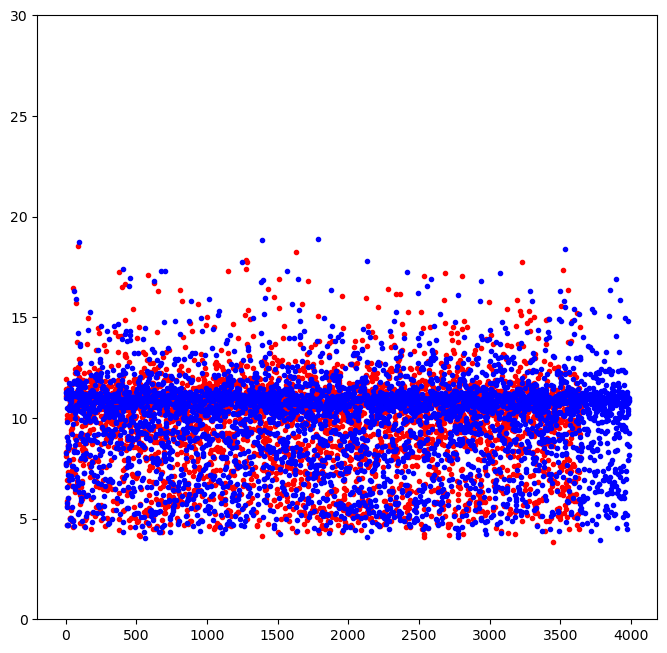

In [88]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.ylim(0, 30)  
plt.plot(R_Gaia_final, 'r.')
plt.plot(R_APO3_final, 'b.')
print(min(R_Gaia_final), max(R_Gaia_final))
print(min(R_APO3_final), max(R_APO3_final)) 
#Gaia and APO3 are pretty similar although the new Gaia data looks slightly better in the y direc.
#what is happening in x direc?